# Caltech-101 Image Classification

### Importing the libraries

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers
import tensorflow as tf
from keras.callbacks import EarlyStopping
import os
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from warnings import simplefilter
simplefilter(action='ignore', category = DeprecationWarning)

### Loading the images

In [20]:
def load_dataset(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
path = "C:/Users/krish/Desktop/COMP5013/101_ObjectCategories"
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

folders = sorted(os.listdir(path))
nfolders = len(folders)
imgs = []
labels = []

[101] CATEGORIES ARE IN 
 C:/Users/krish/Desktop/COMP5013/101_ObjectCategories


### Scaling and normalizing pictures

In [21]:
for i, folder in enumerate(folders):
    iter = 0
    for f in os.listdir(path + "/" + folder):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + folder, f)
            img = scipy.misc.imresize(load_dataset(fullpath), [128,128,3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            imgs.append(img) 
            label_curr = i
            labels.append(label_curr)
        
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)))
print (nfolders)

Num imgs: 8677
Num labels: 8677
101


### Splitting the data

In [4]:
#splitting the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(imgs, labels,test_size = 0.30)
X_train = np.stack(X_train, axis=0)
y_train = np.stack(y_train, axis=0)
X_test = np.stack(X_test, axis=0)
y_test = np.stack(y_test, axis=0)
print ("Num train_imgs: %d" % (len(X_train)))
print ("Num test_imgs: %d" % (len(X_test)))

# one hot encode target values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes= y_test.shape[1]

Num train_imgs: 6073
Num test_imgs: 2604


### Initialising the default values

In [5]:
seed = 7
np.random.seed(seed)

epochs =200
lrate = 0.01
decay = lrate/epochs

np.random.seed(seed)

### Defining and running Baseline : 4 VGG Block for 100 epochs 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 256)      

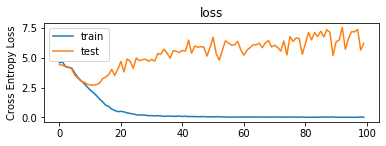

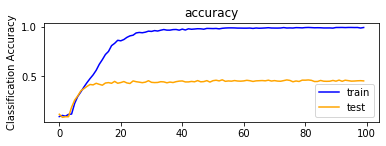

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(128,128,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
    
opt = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,batch_size=64,epochs = 100,validation_data=(X_test, y_test), shuffle=True)

model.save('model_appraoch_1_100.h5')
#evaluating the test dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

pyplot.subplot(211)
pyplot.ylabel('Cross Entropy Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
#plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
pyplot.subplot(212)
pyplot.ylabel('Classification Accuracy')
plt.plot(history.history['acc'], color = 'blue', label = 'train')
plt.plot(history.history['val_acc'], color = 'orange', label = 'test')
plt.legend(['train','test'])
plt.title('accuracy')
pyplot.show()
pyplot.close()

### Defining and running Baseline : 8 VGG Block running for 200 epochs with Dropout Regularization

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)      

Epoch 27/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.2142 - acc: 0.9475 - val_loss: 3.3305 - val_acc: 0.5261
Epoch 28/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.1778 - acc: 0.9593 - val_loss: 3.1911 - val_acc: 0.5511
Epoch 29/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.1321 - acc: 0.9677 - val_loss: 3.0331 - val_acc: 0.5584
Epoch 30/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.1484 - acc: 0.9621 - val_loss: 3.9486 - val_acc: 0.5461
Epoch 31/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.1260 - acc: 0.9725 - val_loss: 2.3824 - val_acc: 0.5595
Epoch 32/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0923 - acc: 0.9774 - val_loss: 2.7714 - val_acc: 0.5634
Epoch 33/200
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0792 - acc: 0.9788 - val_loss: 3.3395 - val_acc: 0.5630
Epoch 34/200
6073/6073 [=================

Epoch 87/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0083 - acc: 0.9979 - val_loss: 3.2911 - val_acc: 0.5733
Epoch 88/200
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0052 - acc: 0.9985 - val_loss: 3.9128 - val_acc: 0.5776
Epoch 89/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0025 - acc: 0.9988 - val_loss: 4.1400 - val_acc: 0.5764
Epoch 90/200
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0085 - acc: 0.9984 - val_loss: 3.8956 - val_acc: 0.5726
Epoch 91/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0092 - acc: 0.9974 - val_loss: 3.8705 - val_acc: 0.5737
Epoch 92/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 3.7395 - val_acc: 0.5726
Epoch 93/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0074 - acc: 0.9979 - val_loss: 3.3587 - val_acc: 0.5687
Epoch 94/200
6073/6073 [=================

Epoch 146/200
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 3.8880 - val_acc: 0.5806
Epoch 147/200
6073/6073 [==============================] - 35s 6ms/step - loss: 7.0458e-04 - acc: 0.9998 - val_loss: 4.2749 - val_acc: 0.5772
Epoch 148/200
6073/6073 [==============================] - 36s 6ms/step - loss: 5.7437e-04 - acc: 0.9998 - val_loss: 4.3636 - val_acc: 0.5810
Epoch 149/200
6073/6073 [==============================] - 36s 6ms/step - loss: 4.2507e-04 - acc: 0.9997 - val_loss: 4.4762 - val_acc: 0.5818
Epoch 150/200
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0011 - acc: 0.9995 - val_loss: 4.3730 - val_acc: 0.5814
Epoch 151/200
6073/6073 [==============================] - 35s 6ms/step - loss: 5.5040e-04 - acc: 0.9998 - val_loss: 4.1612 - val_acc: 0.5810
Epoch 152/200
6073/6073 [==============================] - 36s 6ms/step - loss: 9.0813e-04 - acc: 0.9997 - val_loss: 4.4430 - val_acc: 0.5810
Epoch 153/200


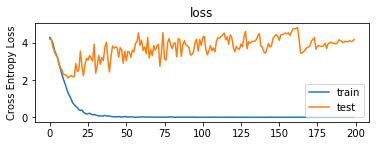

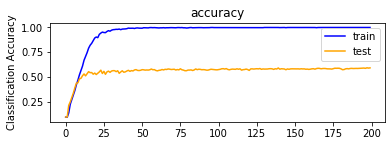

In [6]:
model = Sequential()
    
model.add(Conv2D(64, (3, 3), input_shape=(128,128,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
    
opt = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
print(model.summary())


history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test),epochs=200, shuffle=True)

# save model
model.save('model_approach_2_200.h5')
#evaluating the test dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

pyplot.subplot(211)
pyplot.ylabel('Cross Entropy Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
#plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
pyplot.subplot(212)
pyplot.ylabel('Classification Accuracy')
plt.plot(history.history['acc'], color = 'blue', label = 'train')
plt.plot(history.history['val_acc'], color = 'orange', label = 'test')
plt.legend(['train','test'])
plt.title('accuracy')
pyplot.show()
pyplot.close()

### Defining and running Baseline : 8 VGG Block for 400 epochs with Dropout Regularization and Data Augmentation

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)      

95/95 [==============================] - 34s 360ms/step - loss: 0.5554 - accuracy: 0.8390 - val_loss: 83.2620 - val_accuracy: 0.5380
Epoch 87/400
95/95 [==============================] - 34s 360ms/step - loss: 0.5562 - accuracy: 0.8408 - val_loss: 71.1196 - val_accuracy: 0.5526
Epoch 88/400
95/95 [==============================] - 34s 360ms/step - loss: 0.5465 - accuracy: 0.8388 - val_loss: 78.3322 - val_accuracy: 0.5346
Epoch 89/400
95/95 [==============================] - 34s 358ms/step - loss: 0.5494 - accuracy: 0.8427 - val_loss: 76.2307 - val_accuracy: 0.5250
Epoch 90/400
95/95 [==============================] - 34s 363ms/step - loss: 0.5190 - accuracy: 0.8488 - val_loss: 80.4030 - val_accuracy: 0.5607
Epoch 91/400
95/95 [==============================] - 34s 360ms/step - loss: 0.5126 - accuracy: 0.8538 - val_loss: 87.2948 - val_accuracy: 0.5276
Epoch 92/400
95/95 [==============================] - 34s 359ms/step - loss: 0.5005 - accuracy: 0.8567 - val_loss: 84.0703 - val_accuracy

Epoch 142/400
95/95 [==============================] - 34s 359ms/step - loss: 0.1488 - accuracy: 0.9562 - val_loss: 77.1582 - val_accuracy: 0.5829
Epoch 143/400
95/95 [==============================] - 34s 360ms/step - loss: 0.1386 - accuracy: 0.9565 - val_loss: 95.2337 - val_accuracy: 0.5726
Epoch 144/400
95/95 [==============================] - 34s 360ms/step - loss: 0.1561 - accuracy: 0.9560 - val_loss: 98.5122 - val_accuracy: 0.6244
Epoch 145/400
95/95 [==============================] - 34s 359ms/step - loss: 0.1131 - accuracy: 0.9636 - val_loss: 88.6179 - val_accuracy: 0.6233
Epoch 146/400
95/95 [==============================] - 34s 360ms/step - loss: 0.1485 - accuracy: 0.9539 - val_loss: 98.3117 - val_accuracy: 0.6041
Epoch 147/400
95/95 [==============================] - 34s 360ms/step - loss: 0.1533 - accuracy: 0.9529 - val_loss: 89.8914 - val_accuracy: 0.5964
Epoch 148/400
95/95 [==============================] - 34s 360ms/step - loss: 0.1377 - accuracy: 0.9549 - val_loss: 92

95/95 [==============================] - 34s 358ms/step - loss: 0.0451 - accuracy: 0.9868 - val_loss: 108.7896 - val_accuracy: 0.6310
Epoch 253/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0671 - accuracy: 0.9822 - val_loss: 105.4737 - val_accuracy: 0.6152
Epoch 254/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 104.9113 - val_accuracy: 0.6336
Epoch 255/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 102.5301 - val_accuracy: 0.6440
Epoch 256/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0273 - accuracy: 0.9921 - val_loss: 94.4214 - val_accuracy: 0.6340
Epoch 257/400
95/95 [==============================] - 34s 358ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 100.9978 - val_accuracy: 0.6221
Epoch 258/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0416 - accuracy: 0.9895 - val_loss: 104.1293 - 

95/95 [==============================] - 34s 358ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 114.4935 - val_accuracy: 0.6429
Epoch 363/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0093 - accuracy: 0.9965 - val_loss: 127.9438 - val_accuracy: 0.6402
Epoch 364/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 116.0864 - val_accuracy: 0.6482
Epoch 365/400
95/95 [==============================] - 34s 358ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 96.1093 - val_accuracy: 0.6548
Epoch 366/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 109.7668 - val_accuracy: 0.6290
Epoch 367/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 109.7284 - val_accuracy: 0.6475
Epoch 368/400
95/95 [==============================] - 34s 359ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 117.2646 - 

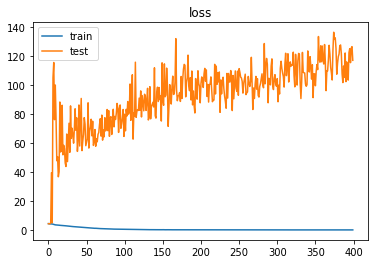

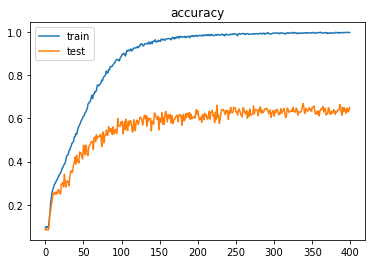

In [7]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

decay = 0.01/400
sgd = SGD(lr=0.01, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

np.random.seed(seed)

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)
hist = model.fit(datagen.flow(X_train, y_train,  batch_size=64), validation_data=(X_test, y_test),epochs=400, shuffle=True)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")

In [8]:
model.save('model_appraoch3_400.h5')

### Evaluating the Approach-1  on test set

#### Loading the model_appraoch_1_100.h5

In [22]:
from keras.models import load_model

model_test = load_model('model_appraoch_1_100.h5')
scores = model_test.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.02%


### Evaluating the Approach-2  on test set

#### Loading the model_approach_2_200.h5

In [23]:
from keras.models import load_model

model_test = load_model('model_approach_2_200.h5')
scores = model_test.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 59.14%


### Evaluating the Approach-3  on test set

#### Loading the model_approach3_400.h5

In [16]:
from keras.models import load_model

model_test = load_model('model_appraoch3_400.h5')
scores = model_test.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.98%


Rinda Digamarthi(157742d)